# Linear Regression Model using Python

## Objective

This project aims at predicting an outcome (e.g., house prices) based on a single feature (e.g., house area).

It can be achieved through:
- Exploring a real-world dataset
- Preparing and splitting data for training and testing
- Building a simple linear regression model using Scikit-learn’s LinearRegression
- Evaluating the model using key metrics i.e., MAE, MSE, RMSE, and R² Score
- Visualizing predictions and regression lines
- Publishing the project on GitHub/Portfolio

In [158]:
# Import relevant libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## Loading Datasets

In [159]:
# Load the dataset
df1 = pd.read_csv("../PROJECTS/Regression Datasets/wk07-regression/areas.csv")
df1.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [160]:
df2 = pd.read_csv("../PROJECTS/Regression Datasets/wk07-regression/homeprices.csv")
df2.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [161]:
df3 = pd.read_csv("../PROJECTS/Regression Datasets/wk07-regression/homeprices-m.csv")
df3.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


# Exploratory Data Analysis

In [162]:
df3.shape

(6, 4)

In [163]:
# Check for irregularities in the data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


- Presence of missing value in `bedrooms` column.
- `bedrooms` should be of integer datatype.

In [164]:
df3.isnull().sum() / df3.shape[0] * 100

area         0.000000
bedrooms    16.666667
age          0.000000
price        0.000000
dtype: float64

In [180]:
# Check summary statistics of the dataset
df3.describe()

,area,bedrooms,age,price
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.166667,16.500000,648333.333333
std,587.934237,1.169045,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,4.750000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


## Handling missing value of `bedrooms`

- The missing value was filled by `median` i.e. the middle value in the number of `bedrooms`, since the value was missing at random (MAR).

In [166]:
# Impute missing value in `bedrooms` column
df3['bedrooms'] = df3['bedrooms'].fillna(df3['bedrooms'].median()).astype(int)
# df3['bedrooms'] = df3['bedrooms'].fillna(df3['bedrooms'].mode()[0]).astype(int)
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int32
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int32(1), int64(3)
memory usage: 300.0 bytes


In [181]:
df3

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


## Visualizing Data

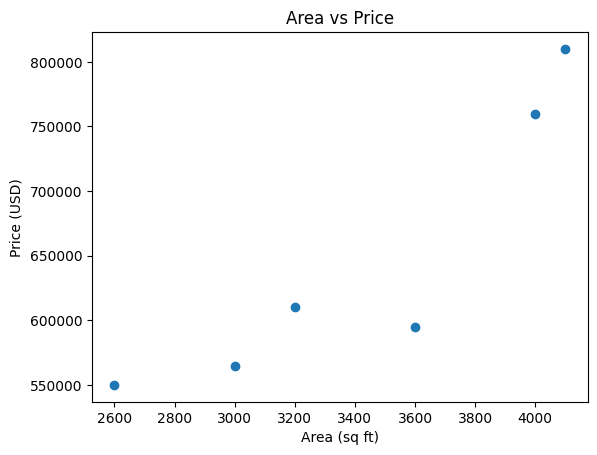

In [168]:
# Scatter plot for `area` vs `price`
plt.scatter(df3['area'], df3['price'])
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Area vs Price')
plt.show();

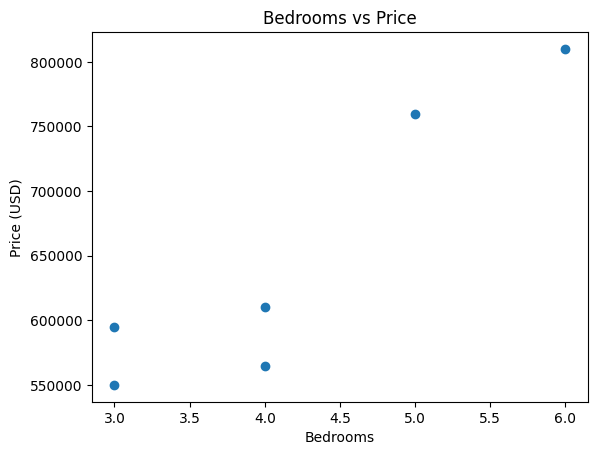

In [169]:
# Scatter plot for `bedrooms` vs `price`
plt.scatter(df3['bedrooms'], df3['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price (USD)')
plt.title('Bedrooms vs Price')
plt.show();


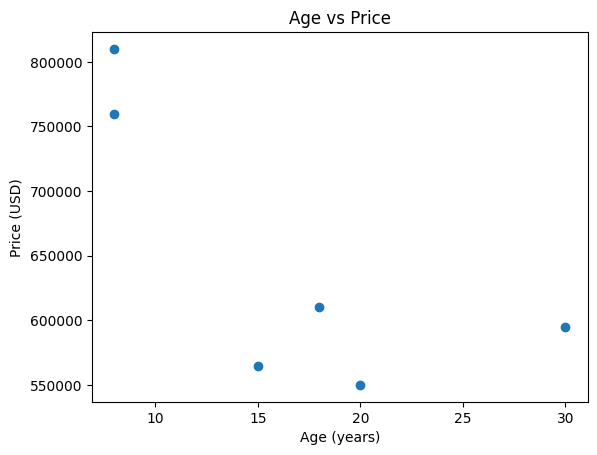

In [170]:
# Scatter plot for `age` vs `price`
plt.scatter(df3['age'], df3['price'])
plt.xlabel('Age (years)')
plt.ylabel('Price (USD)')
plt.title('Age vs Price')
plt.show();


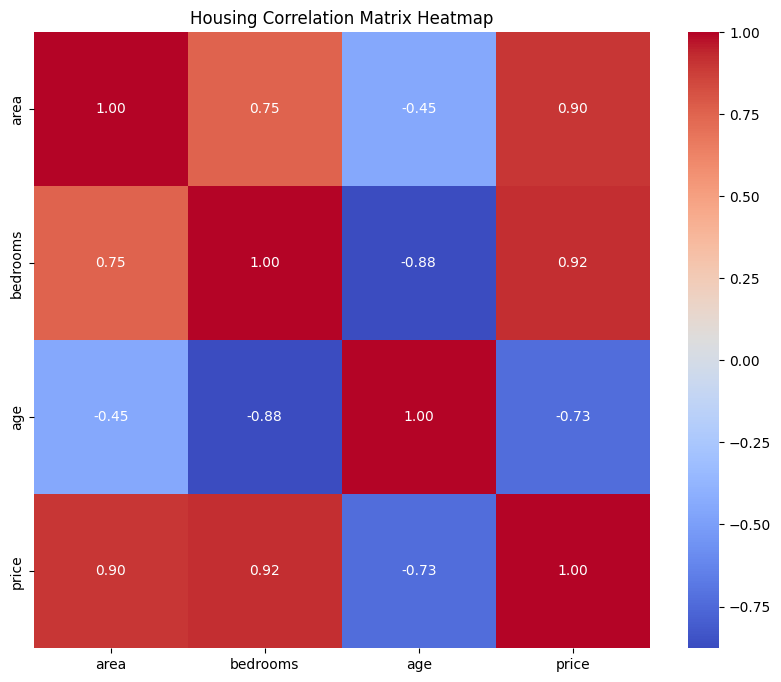

In [171]:
# Correlation matrix
corr_matrix = df3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Housing Correlation Matrix Heatmap')
plt.show();

**Observations**
- There `age` of the house has a `negative relationship` with the `price`. As the `age` of the house increases, the `price` decreases.
- The `area` and the `number of bedrooms` show a positive relationship with the `price`. As the `area` and the `number of bedrooms` increases, the `price` of the house also increases.

## Feature Engineering
- Define the `target` and `feature` variables
- Split the dataset into `train` and `test`

In [172]:
# Drop the target variable
X = df3.drop(columns=['price'])
# Define the features and target variable
# X = df3.drop(columns=['area', 'bedrooms', 'age']) 
y = df3['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the Model using Linear Regression

In [179]:
# Instantiate the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

In [174]:
# Print the coefficients
print("Coefficients:", pd.DataFrame(lr.coef_))

Coefficients:               0
0    115.671642
1  38432.835821
2  -1902.985075


In [175]:

# Print the intercept
print("Intercept:", lr.intercept_)

Intercept: 120373.13432834996


In [176]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1713617314.55
R-squared: -29.46


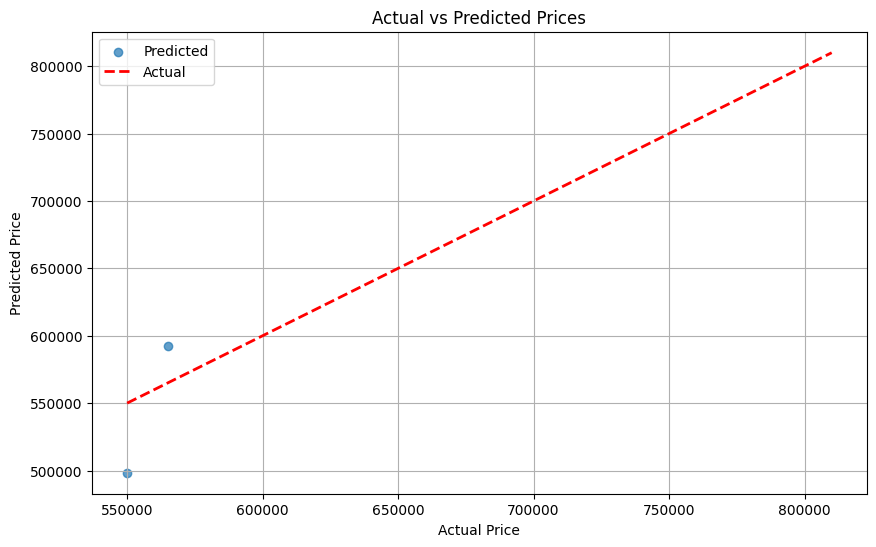

In [177]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend(['Predicted', 'Actual'])
plt.grid()
plt.show();

### Conclusion
- The model performed fairly due to the distance between the actual and predicted values. The model can be improved in future by performing hyperparameter tuning. 